# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Optimization-in-Julia" data-toc-modified-id="Optimization-in-Julia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimization in Julia</a></div><div class="lev2 toc-item"><a href="#Flowchart" data-toc-modified-id="Flowchart-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Flowchart</a></div><div class="lev2 toc-item"><a href="#DCP-Using-Convex.jl" data-toc-modified-id="DCP-Using-Convex.jl-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DCP Using Convex.jl</a></div><div class="lev3 toc-item"><a href="#Example:-microbiome-regression-analysis" data-toc-modified-id="Example:-microbiome-regression-analysis-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example: microbiome regression analysis</a></div><div class="lev3 toc-item"><a href="#Sum-to-zero-regression" data-toc-modified-id="Sum-to-zero-regression-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Sum-to-zero regression</a></div><div class="lev3 toc-item"><a href="#Sum-to-zero-lasso" data-toc-modified-id="Sum-to-zero-lasso-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Sum-to-zero lasso</a></div><div class="lev3 toc-item"><a href="#Sum-to-zero-group-lasso" data-toc-modified-id="Sum-to-zero-group-lasso-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Sum-to-zero group lasso</a></div><div class="lev3 toc-item"><a href="#Example:-matrix-completion" data-toc-modified-id="Example:-matrix-completion-125"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Example: matrix completion</a></div><div class="lev2 toc-item"><a href="#Nonlinear-programming-(NLP)" data-toc-modified-id="Nonlinear-programming-(NLP)-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Nonlinear programming (NLP)</a></div>

# Optimization in Julia

This lecture gives an overview of some optimization tools in Julia.

**Warning**: Some code chunks will not run on the server because Mosek/Gurobi (commercial software) are not available on the server.

Machine information:

In [2]:
versioninfo()

Julia Version 0.6.4
Commit 9d11f62bcb (2018-07-09 19:09 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell MAX_THREADS=16)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)


## Flowchart

* Statisticians do optimizations in daily life: maximum likelihood estimation, machine learning, ...

* Category of optimization problems:

    1. Problems with analytical solutions: least squares, principle component analysis, canonical correlation analysis, ...
    
    2. Problems subject to Disciplined Convex Programming (DCP): linear programming (LP), quadratic programming (QP), second-order cone programming (SOCP), semidefinite programming (SDP), and geometric programming (GP).
    
    3. Nonlinear programming (NLP): Newton type algorithms, Fisher scoring algorithm, EM algorithm, MM algorithms. 
    
    4. Large scale optimization: ADMM, SGD, ...

![Flowchart](./optimization_flowchart.png)

## DCP Using Convex.jl

Standard convex problem classes like LP (linear programming), QP (quadratic programming), SOCP (second-order cone programming), SDP (semidefinite programming), and GP (geometric programming), are becoming a **technology**.

![DCP Hierarchy](./convex-hierarchy.png)

Getting familiar with **good** optimization softwares broadens the scope and scale of problems we are able to solve in statistics. Following table lists some of the best optimization softwares. 

|           |   | LP | MILP | SOCP |     MISOCP     | SDP | GP | NLP | MINLP |   | R | Matlab | Julia | Python |   | Cost |
|:---------:|:-:|:--:|:----:|:----:|:--------------:|:---:|:--:|:---:|:-----:|:-:|:-:|:------:|:-----:|:------:|:-:|:----:|
|   **modeling tools**   |   |    |      |      |                |     |    |     |       |   |   |        |       |        |   |      |
|    cvx    |   |  x |   x  |   x  |        x       |  x  |  x |     |       |   |   |    x   |       |    x   |   |   A  |
| Convex.jl |   |  x |   x  |   x  |        x       |  x  |    |     |       |   |   |        |   x   |        |   |   O  |
|  JuMP.jl  |   |  x |   x  |   x  |        x       |     |    |  x  |   x   |   |   |        |   x   |        |   |   O  |
|   **convex solvers** |   |    |      |      |                |     |    |     |       |   |   |        |       |        |   |      |
|   Mosek   |   |  x |   x  |   x  |        x       |  x  |  x |  x  |       |   | x |    x   |   x   |    x   |   |   A  |
|   Gurobi  |   |  x |   x  |   x  |        x       |     |    |     |       |   | x |    x   |   x   |    x   |   |   A  |
|   CPLEX   |   |  x |   x  |   x  |        x       |     |    |     |       |   | x |    x   |   x   |    x   |   |   A  |
|    SCS    |   |  x |      |   x  |                |  x  |    |     |       |   |   |    x   |   x   |    x   |   |   O  |
|   SeDuMi  |   |  x |      |   x  |                |  x  |  ? |     |       |   |   |    x   |       |        |   |   O  |
|   SDPT3   |   |  x |      |   x  |                |  x  |  ? |     |       |   |   |    x   |       |        |   |   O  |
|   **NLP solvers**  |   |    |      |      |                |     |    |     |       |   |   |        |       |        |   |      |
|   NLopt   |   |  x |      |      |                |     |    |  x  |       |   |   |    x   |   x   |    x   |   |   O  |
|   Ipopt   |   |  x |      |      |                |     |    |  x  |       |   |   |    x   |   x   |    x   |   |   O  |
|   KNITRO  |   |  x |   x  |      |                |     |    |  x  |   x   |   | x |    x   |   x   |    x   |   |   $  |

* O: open source  
* A: free academic license  
* $: commercial

* Difference between **modeling tool** and **solvers**

    - **Modeling tools** such as cvx (for Matlab) and Convex.jl (Julia analog of cvx) implement the disciplined convex programming (DCP) paradigm proposed by Grant and Boyd (2008) <http://stanford.edu/~boyd/papers/disc_cvx_prog.html>. DCP prescribes a set of simple rules from which users can construct convex optimization problems easily.
    
    - **Solvers** (Mosek, Gurobi, Cplex, SCS, ...) are concrete software implementation of optimization algorithms. My favorite ones are: Mosek/Gurobi/SCS for DCP and Ipopt/NLopt for nonlinear programming. Mosek and Gurobi are commercial software but free for academic use. SCS/Ipopt/NLopt are open source.  
    
    - Modeling tools usually have the capability to use a variety of solvers. But modeling tools are solver agnostic so users do not have to worry about specific solver interface.

### Example: microbiome regression analysis

We illustrate optimization tools in Julia using a microbiome analysis example.

16S microbiome sequencing techonology generates sequence counts of various organisms (OTUs, operational taxonomic units) in samples. 

![Microbiome Data](./microbiome_data.png)

For statistical analysis, counts are normalized into proportions for each sample, resulting in a covariate matrix $\mathbf{X}$ with all rows summing to 1. Because of the degeneracy in the covariates, we need to add a sum-to-zero constraint to the regression cofficients. In other words, we need to solve a constrained least squares problem  
$$
    \text{minimize} \frac 12 \|\mathbf{y} - \mathbf{X} \beta\|_2^2
$$
subject to the constraint $\sum_{j=1}^p \beta_j = 0$. For simplicity we ignore intercept and non-OTU covariates in the presentation.

Let's first generate an artifical data set.

In [3]:
srand(123) # seed
n, p = 100, 50
X = rand(n, p)
X = Diagonal(1 ./ vec(sum(X, 2))) * X
β = sprandn(p, 0.1) # sparse vector with about 10% non-zero entries
y = X * β + randn(n);

Load the Convex.jl package and chooose a solver. Note Gurobi and Mosek (commercial) are not installed on the server; use SCS solver (open source) on the server.

In [4]:
using Convex

## Use Gurobi solver
#using Gurobi
#solver = GurobiSolver(OutputFlag=0)
#set_default_solver(solver)

# # Use Mosek solver
# using Mosek
# solver = MosekSolver(LOG=1)
# set_default_solver(solver)

# Use SCS solver
using SCS
solver = SCSSolver(verbose=1)
set_default_solver(solver)

SCS.SCSSolver(Any[(:verbose, 1)])

### Sum-to-zero regression

The sum-to-zero contrained least squares is a standard quadratic programming (QP) problem so should be solved easily by any QP solver.

In [6]:
β̂cls = Variable(size(X, 2))
problem = minimize(0.5sumsquares(y - X * β̂cls)) # objective
problem.constraints += sum(β̂cls) == 0 # constraint
@time solve!(problem)

  0.008839 seconds (2.91 k allocations: 1.691 MiB)
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 5056
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 53, constraints m = 107
Cones:	primal zero / dual free vars: 2
	linear vars: 1
	soc vars: 104, soc blks: 2
Setup time: 6.32e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  7.24e-05 
   100| 4.91e-03  1.72e-02  4.51e-03  2.58e+01  2.60e+01  0.00e+00  2.30e-03 
   200| 2.05e-04  7.10e-04  1.82e-04  2.64e+01  2.64e+0

### Sum-to-zero lasso

Suppose we want to know which organisms (OTU) are associated with the response. We can answer this question using a sum-to-zero contrained lasso
$$
    \text{minimize} \frac 12 \|\mathbf{y} - \mathbf{X} \beta\|_2^2 + \lambda \|\beta\|_1
$$
subject to the constraint $\sum_{j=1}^p \beta_j = 0$. Varying $\lambda$ from small to large values will generate a solution path.

In [8]:
# Use SCS solver
using SCS
solver = SCSSolver(verbose=0)
set_default_solver(solver)

# solve at a grid of λ
λgrid = 0:0.01:0.35
β̂path = zeros(length(λgrid), size(X, 2)) # each row is β̂ at a λ
β̂classo = Variable(size(X, 2))
@time for i in 1:length(λgrid)
    λ = λgrid[i]
    # objective
    problem = minimize(0.5sumsquares(y - X * β̂classo) + λ * sum(abs, β̂classo))
    # constraint
    problem.constraints += sum(β̂classo) == 0 # constraint
    solve!(problem)
    β̂path[i, :] = β̂classo.value
end

  1.025079 seconds (1.60 M allocations: 853.660 MiB, 19.00% gc time)


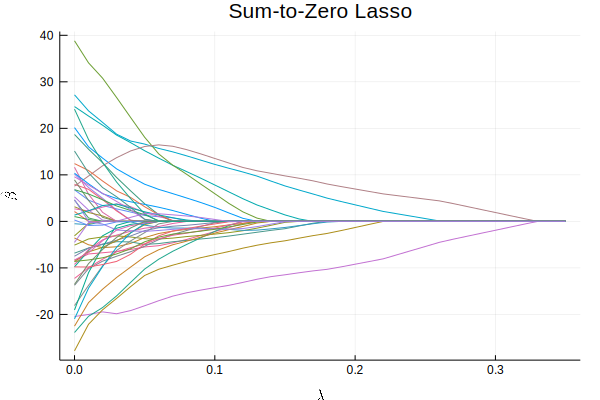

In [9]:
using Plots; gr()
using LaTeXStrings

p = plot(collect(λgrid), β̂path, legend=:none)
xlabel!(p, L"\lambda")
ylabel!(p, L"\hat \beta")
title!(p, "Sum-to-Zero Lasso")

### Sum-to-zero group lasso

Suppose we want to do variable selection not at the OTU level, but at the Phylum level. OTUs are clustered into various Phyla. We can answer this question using a sum-to-zero contrained group lasso
$$
    \text{minimize} \frac 12 \|\mathbf{y} - \mathbf{X} \beta\|_2^2 + \lambda \sum_j \|\mathbf{\beta}_j\|_2
$$
subject to the constraint $\sum_{j=1}^p \beta_j = 0$, where $\mathbf{\beta}_j$ are regression coefficients corresponding to the $j$-th phylum. This is a second-order cone programming (SOCP) problem readily modeled by Convex.jl.

Let's assume each 10 continuous OTUs belong to one Phylum.

In [10]:
# Use SCS solver
using SCS
solver = SCSSolver(verbose=0)
set_default_solver(solver)

# solve at a grid of λ
λgrid = 0.1:0.005:0.5
β̂pathgrp = zeros(length(λgrid), size(X, 2)) # each row is β̂ at a λ
β̂classo = Variable(size(X, 2))
@time for i in 1:length(λgrid)
    λ = λgrid[i]
    # objective
    obj = 0.5sumsquares(y - X * β̂classo)
    for j in 1:(size(X, 2)/10)
        βj = β̂classo[(10(j-1)+1):10j]
        obj += λ * vecnorm(βj)
    end
    problem = minimize(obj)
    # constraint
    problem.constraints += sum(β̂classo) == 0 # constraint
    solve!(problem)
    β̂pathgrp[i, :] = β̂classo.value
end

  3.577693 seconds (2.31 M allocations: 337.761 MiB, 3.05% gc time)


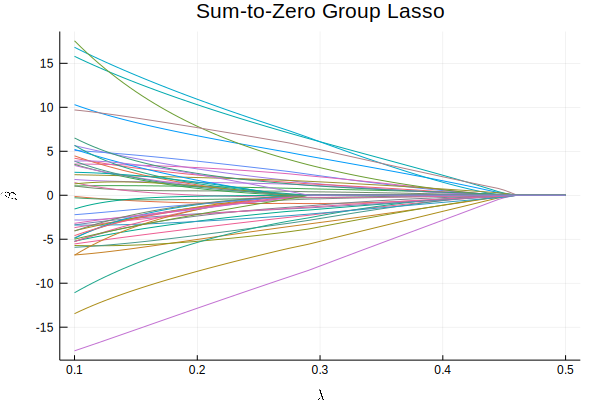

In [11]:
p2 = plot(collect(λgrid), β̂pathgrp, legend=:none)
xlabel!(p2, L"\lambda")
ylabel!(p2, L"\hat \beta")
title!(p2, "Sum-to-Zero Group Lasso")

### Example: matrix completion

Load the $128 \times 128$ Lena picture with missing pixels.

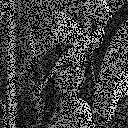

In [12]:
using Images

lena = load("lena128missing.png")

In [13]:
# convert to real matrices
Y = Float64.(lena)

128×128 Array{Float64,2}:
 0.0       0.0       0.635294  0.0       …  0.0       0.0       0.627451
 0.627451  0.623529  0.0       0.611765     0.0       0.0       0.388235
 0.611765  0.611765  0.0       0.0          0.403922  0.219608  0.0     
 0.0       0.0       0.611765  0.0          0.223529  0.176471  0.192157
 0.611765  0.0       0.615686  0.615686     0.0       0.0       0.0     
 0.0       0.0       0.0       0.619608  …  0.0       0.0       0.2     
 0.607843  0.0       0.623529  0.0          0.176471  0.192157  0.0     
 0.0       0.0       0.623529  0.0          0.0       0.0       0.215686
 0.619608  0.619608  0.0       0.0          0.2       0.0       0.207843
 0.0       0.0       0.635294  0.635294     0.2       0.192157  0.188235
 0.635294  0.0       0.0       0.0       …  0.192157  0.180392  0.0     
 0.631373  0.0       0.0       0.0          0.0       0.0       0.0     
 0.0       0.627451  0.635294  0.666667     0.172549  0.0       0.184314
 ⋮                       

We fill out the missin pixels uisng a **matrix completion** technique developed by Candes and Tao
$$
    \text{minimize } \|\mathbf{X}\|_*
$$
$$
    \text{subject to } x_{ij} = y_{ij} \text{ for all observed entries } (i, j).
$$
Here $\|\mathbf{M}\|_* = \sum_i \sigma_i(\mathbf{M})$ is the nuclear norm. In words we seek the matrix with minimal nuclear norm that agrees with the observed entries. This is a semidefinite programming (SDP) problem readily modeled by Convex.jl.

This example takes long because of high dimensionality. **Don't run on server**

In [14]:
# Use Mosek solver
using Mosek
solver = MosekSolver(LOG=1)
set_default_solver(solver)

# Linear indices of obs. entries
obsidx = find(Y .≠ 0.0)
# Create optimization variables
X = Convex.Variable(size(Y))
# Set up optmization problem
problem = minimize(nuclearnorm(X))
problem.constraints += X[obsidx] == Y[obsidx]
# Solve the problem by calling solve
@time solve!(problem)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 73665           
  Cones                  : 0               
  Scalar variables       : 49153           
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.06    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

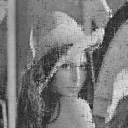

In [17]:
colorview(Gray, X.value)

## Nonlinear programming (NLP)

We use MLE of Gamma distribution to illustrate some rudiments of nonlinear programming (NLP) in Julia. 

Let $x_1,\ldots,x_m$ be a random sample from the gamma density
$$
f(x) = \Gamma(\alpha)^{-1} \beta^{\alpha} x^{\alpha-1} e^{-\beta x}
$$
on $(0,\infty)$. The loglikelihood function is
$$
    L(\alpha, \beta) = m [- \ln \Gamma(\alpha) + \alpha \ln \beta + (\alpha - 1)\overline{\ln x} - \beta \bar x],
$$
where $\overline{x} = \frac{1}{m} \sum_{i=1}^m x_i$ and 
$\overline{\ln x} = \frac{1}{m} \sum_{i=1}^m \ln x_i$. Following function 
evaluates the log-pdf of one data point `x` at parameter `α` and `β`.

In [20]:
function gamma_logpdf(x::Vector, α::Real, β::Real)
    m = length(x)
    avg = mean(x)
    logavg = sum(log, x) / m
    m * (- lgamma(α) + α * log(β) + (α - 1) * logavg - β * avg)
end
x = rand(5)
gamma_logpdf(x, 1.0, 1.0)

-3.4974694457742057

Many optimization algorithms involve taking derivatives of the objective function. The `ForwardDiff` package implements automatic differentiation. For example, to compute the derivative and Hessian of the log-likelihood with data `x` at `α=1.0` and `β=1.0`.

In [21]:
using ForwardDiff
ForwardDiff.gradient(r -> gamma_logpdf(x, r...), [1.0; 1.0])

2-element Array{Float64,1}:
 0.540624
 1.50253 

In [22]:
ForwardDiff.hessian(r -> gamma_logpdf(x, r...), [1.0; 1.0])

2×2 Array{Float64,2}:
 -8.22467   5.0
  5.0      -5.0

Generate data:

In [29]:
using Distributions

srand(123)
(n, p) = (1000, 2)
(α, β) = 5.0 * rand(p)
x = rand(Gamma(α, β), n)
println("True parameter values:")
println("α = ", α, ", β = ", β)

True parameter values:
α = 3.8422383759828493, β = 4.7025750035759355


We use JuMP.jl to define and solve our NLP problem.

In [34]:
using JuMP, Ipopt, NLopt

m = Model(solver = IpoptSolver())
# m = Model(solver = NLoptSolver(algorithm=:LD_MMA))

myf(a, b) = gamma_logpdf(x, a, b)
JuMP.register(m, :myf, 2, myf, autodiff=true)
@variable(m, α >= 1e-8)
@variable(m, β >= 1e-8)
@NLobjective(m, Max, myf(α, β))

print(m)
status = solve(m)

println("MLE (JuMP):")
println("α = ", α, ", β = ", β)
println("Objective value: ", getobjectivevalue(m))
println("α = ", getvalue(α), ", β = ", 1 / getvalue(β))
println("MLE (Distribution package):")
println(fit_mle(Gamma, x))

Max myf(α, β)
Subject to
 α ≥ 1.0e-8
 β ≥ 1.0e-8
This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du l